In [1]:
#Importing libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset
medData = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
medData


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Display total no. of rows and columns
print("Total number of Rows in dataset " + str(medData.shape[0]))
print("Total number of Columns in dataset " + str(medData.shape[1]))

Total number of Rows in dataset 1338
Total number of Columns in dataset 7


In [5]:
# Display top 5 rows of the dataset. 
medData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Display bottom 5 rows of the dataset. 
medData.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
# Printing columns name of the given dataset
medData.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

1) The target column is charges 
2) The features are age, sex, bmi, children, smoker, region

In [8]:
medData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


KEY INFORMATION GAIN:

The dataset comprises 1338 instances featuring 7 attributes with a mix of integer64 (2), object (3), and float64 (2) data types. Among these attributes, the 'sex,' 'smoker,' and 'region' columns are categorical. The second column provides insights into the dataset's size and the count of non-null values for each field. The overall memory consumption for this dataset amounts to approximately 73.3 KB.

In [9]:
medData.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset comprises variables primarily stored as object data types, with the variable's , which is stored as int64 and float64.


In [12]:
# returns the total number of unique values for each variable.
medData.nunique().to_frame("Total No. of Unique Values in each column")

,Total No. of Unique Values in each column
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
#checking the value count for each columns

for col in medData.columns:   
    print('--' * 10 + col + '--' * 10)
    display(med_data[col].value_counts())

--------------------age--------------------


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

--------------------sex--------------------


male      676
female    662
Name: sex, dtype: int64

--------------------bmi--------------------


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

--------------------children--------------------


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

--------------------smoker--------------------


no     1064
yes     274
Name: smoker, dtype: int64

--------------------region--------------------


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

--------------------charges--------------------


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

The dataset displays the total count of unique values for each column and row.


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['sex', 'smoker','region']
for i in encode:
    medData[i] = le.fit_transform(medData[i])

We're employing a label encoder to transform object data types into integer data types, thereby converting the dataset into a categorical form. This conversion allows us to conduct further analysis on the dataset more effectively.

In [53]:
medData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [15]:
medData

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
# Display the Missing Values
medData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Indicates that there are no null values within the dataset.


<Axes: >

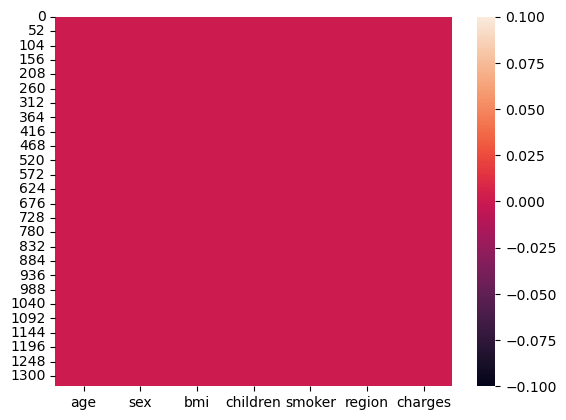

In [17]:
#graphical representaion of null values
sns.heatmap(medData.isnull())

In [18]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
medData.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


The dataset contains 1337 unique rows and 7 columns, with no null values present.

Significant standard deviations are observed in the 'Age' and 'BMI' columns, indicating potential skewness in the data.

Mean values exceed the median (50th percentile) in all columns except 'region', suggesting right-sided skewness, particularly prominent in the 'Charges' column.

Right-skewness is evident in the 'Age,' 'BMI,' and 'Children' columns.

A notable disparity between the 75th percentile (quantile 3) and maximum values in the 'Charges' column suggests skewness and possible outliers.

There is a noticeable difference between Q3 values and maximum values, especially in the 'BMI' column, indicating potential outliers.

# Data Visualization

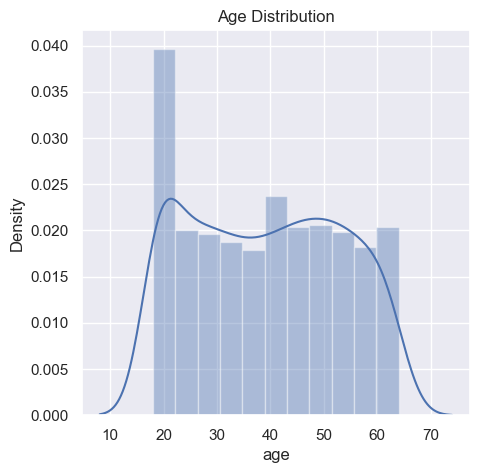

In [20]:
# Analysis of age
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medData['age'])
plt.title('Age Distribution')
plt.show()


Based on the graph, it's evident that a higher proportion of individuals fall within the age range of 20 to 23.

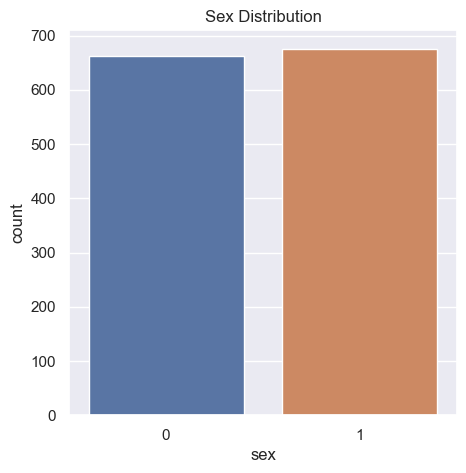

In [21]:
# Analysis for sex
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex', data = medData)
plt.title('Sex Distribution')
plt.show()

The plot indicates that there is minimal disparity between the counts of males and females.

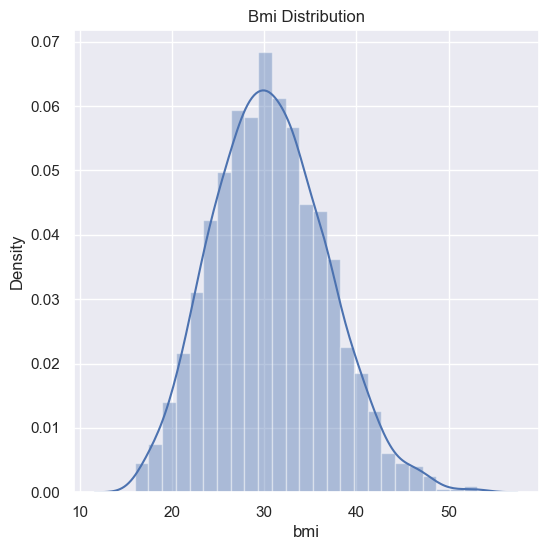

In [22]:
# BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medData['bmi'])
plt.title('Bmi Distribution')
plt.show()

The data depicted above exhibits a normal distribution, as evidenced by the bell-shaped curve.


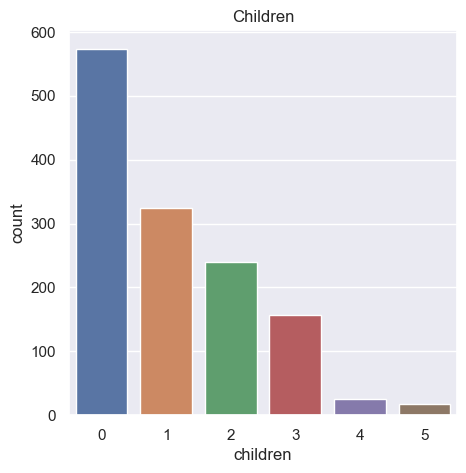

In [23]:
# Analysis for children
plt.figure(figsize=(5,5))
sns.countplot(x = 'children', data = medData)
plt.title('Children')
plt.show()

From the provided data, it's noticeable that the majority of individuals do not have children.


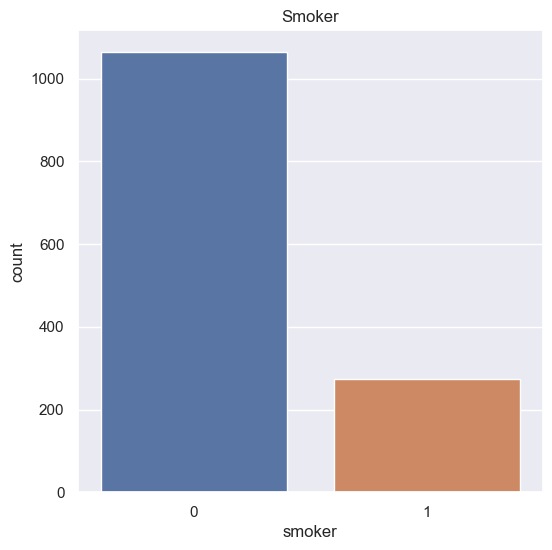

In [24]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=medData)
plt.title('Smoker')
plt.show()


The data suggests that there is a higher count of non-smokers compared to smokers.

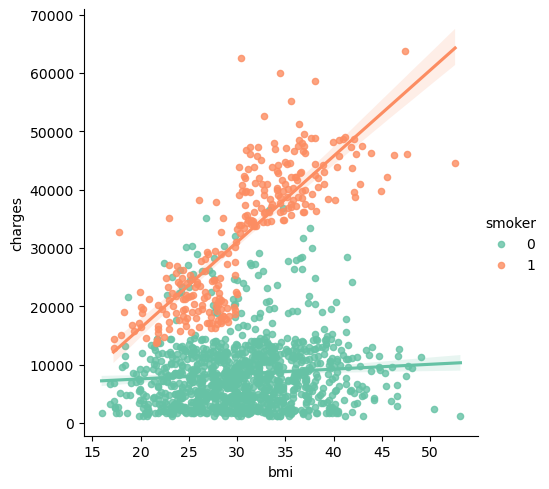

In [96]:
sns.lmplot( x='bmi',y='charges', data=medData, hue='smoker', palette='Set2', scatter_kws={"s": 20})
plt.show()

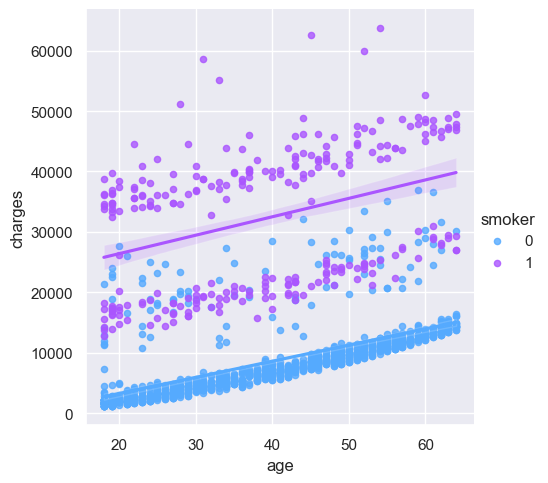

In [25]:
sns.lmplot(x='age', y='charges', hue='smoker', data=medData, palette='cool', scatter_kws={"s": 20})
plt.show()

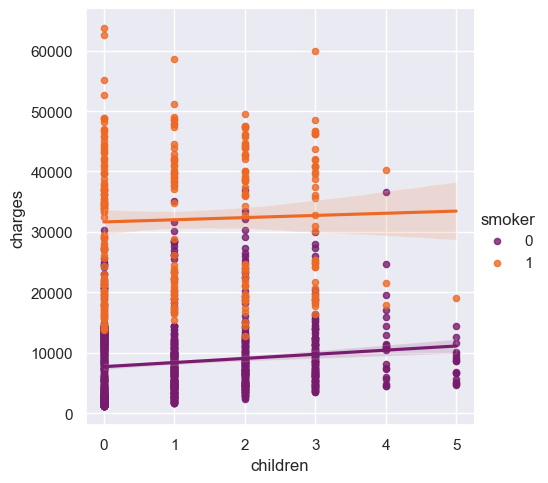

In [26]:
sns.lmplot(x='children', y='charges', hue='smoker', data=medData, palette='inferno', scatter_kws={"s": 20})
plt.show()

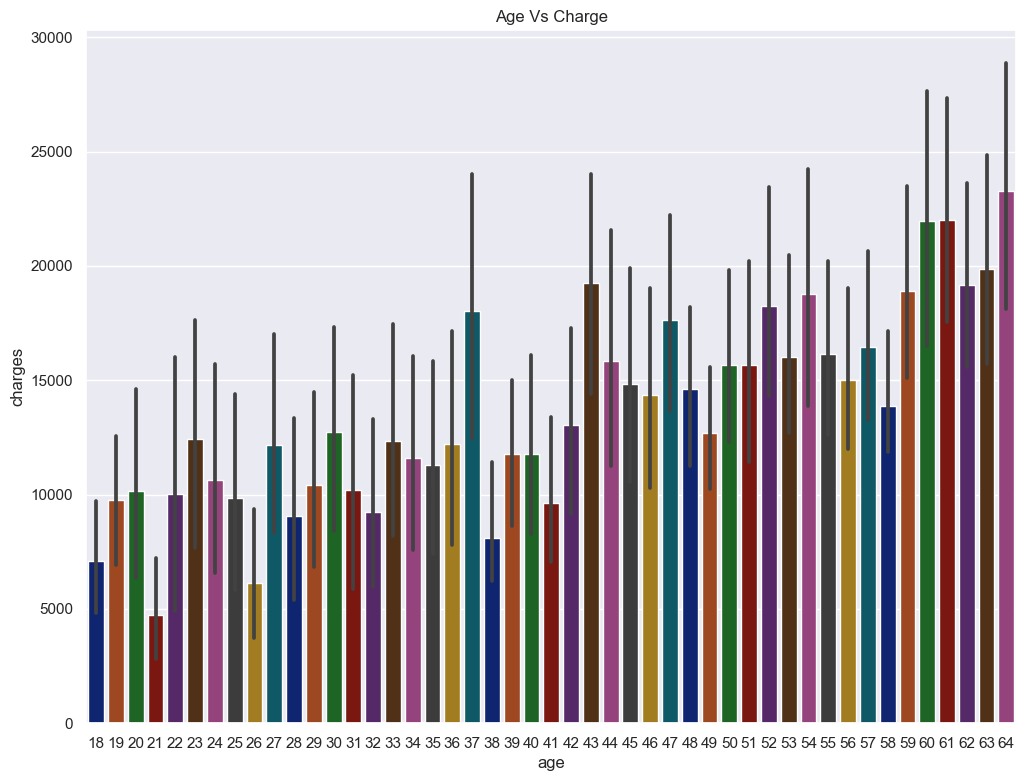

In [28]:
#"Age" with "Charges "

plt.figure(figsize=(12,9))
plt.title('Age Vs Charge')
sns.barplot(x ='age',y ='charges',data = medData , palette = 'dark')
plt.show()


The overall trend indicates a positive relationship between "Age" and "Charges," suggesting that medical expenses tend to rise with age. However, it's important to note that there is considerable variation in charges across every age group, indicating that age alone is not sufficient to accurately predict medical expenses.

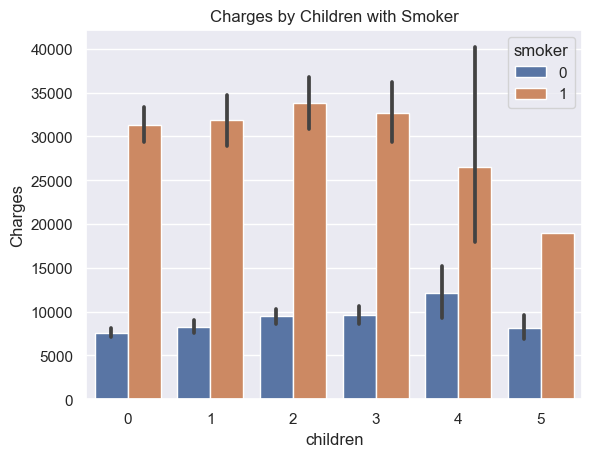

In [29]:
# visiualising Charges by children with smoker.
plt.figsize=(10, 6)
sns.barplot(x="children", y="charges", hue="smoker", data=medData)
plt.ylabel("Charges")
plt.title("Charges by Children with Smoker")
plt.show()

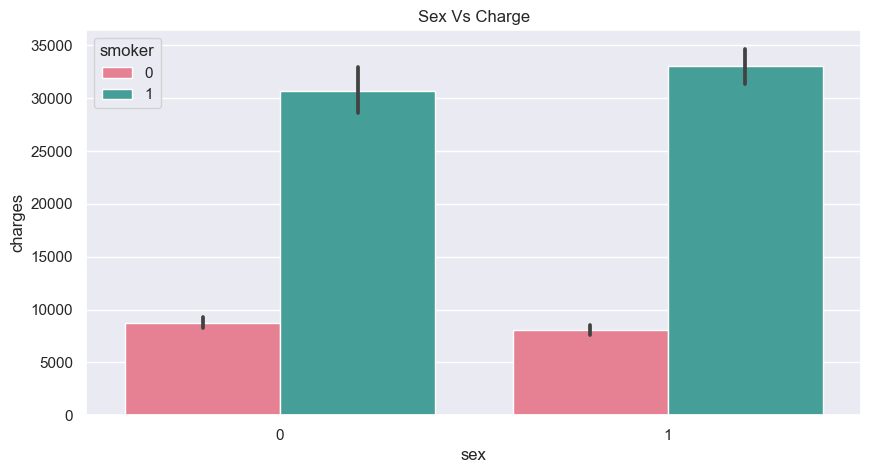

In [30]:
#"Smoker" with "charges" 
plt.figure(figsize=(10,5))
plt.title('Sex Vs Charge')
sns.barplot(x ='sex',y ='charges',hue= "smoker", data = medData , palette = 'husl')
plt.show()


The graph illustrates the patterns of medical costs billed by health insurance for both male and female smokers. It's evident that both genders with smoking habits incur higher medical expenses compared to non-smokers. Furthermore, among smokers, the data suggests that the prevalence of higher medical costs is more pronounced among males than females.

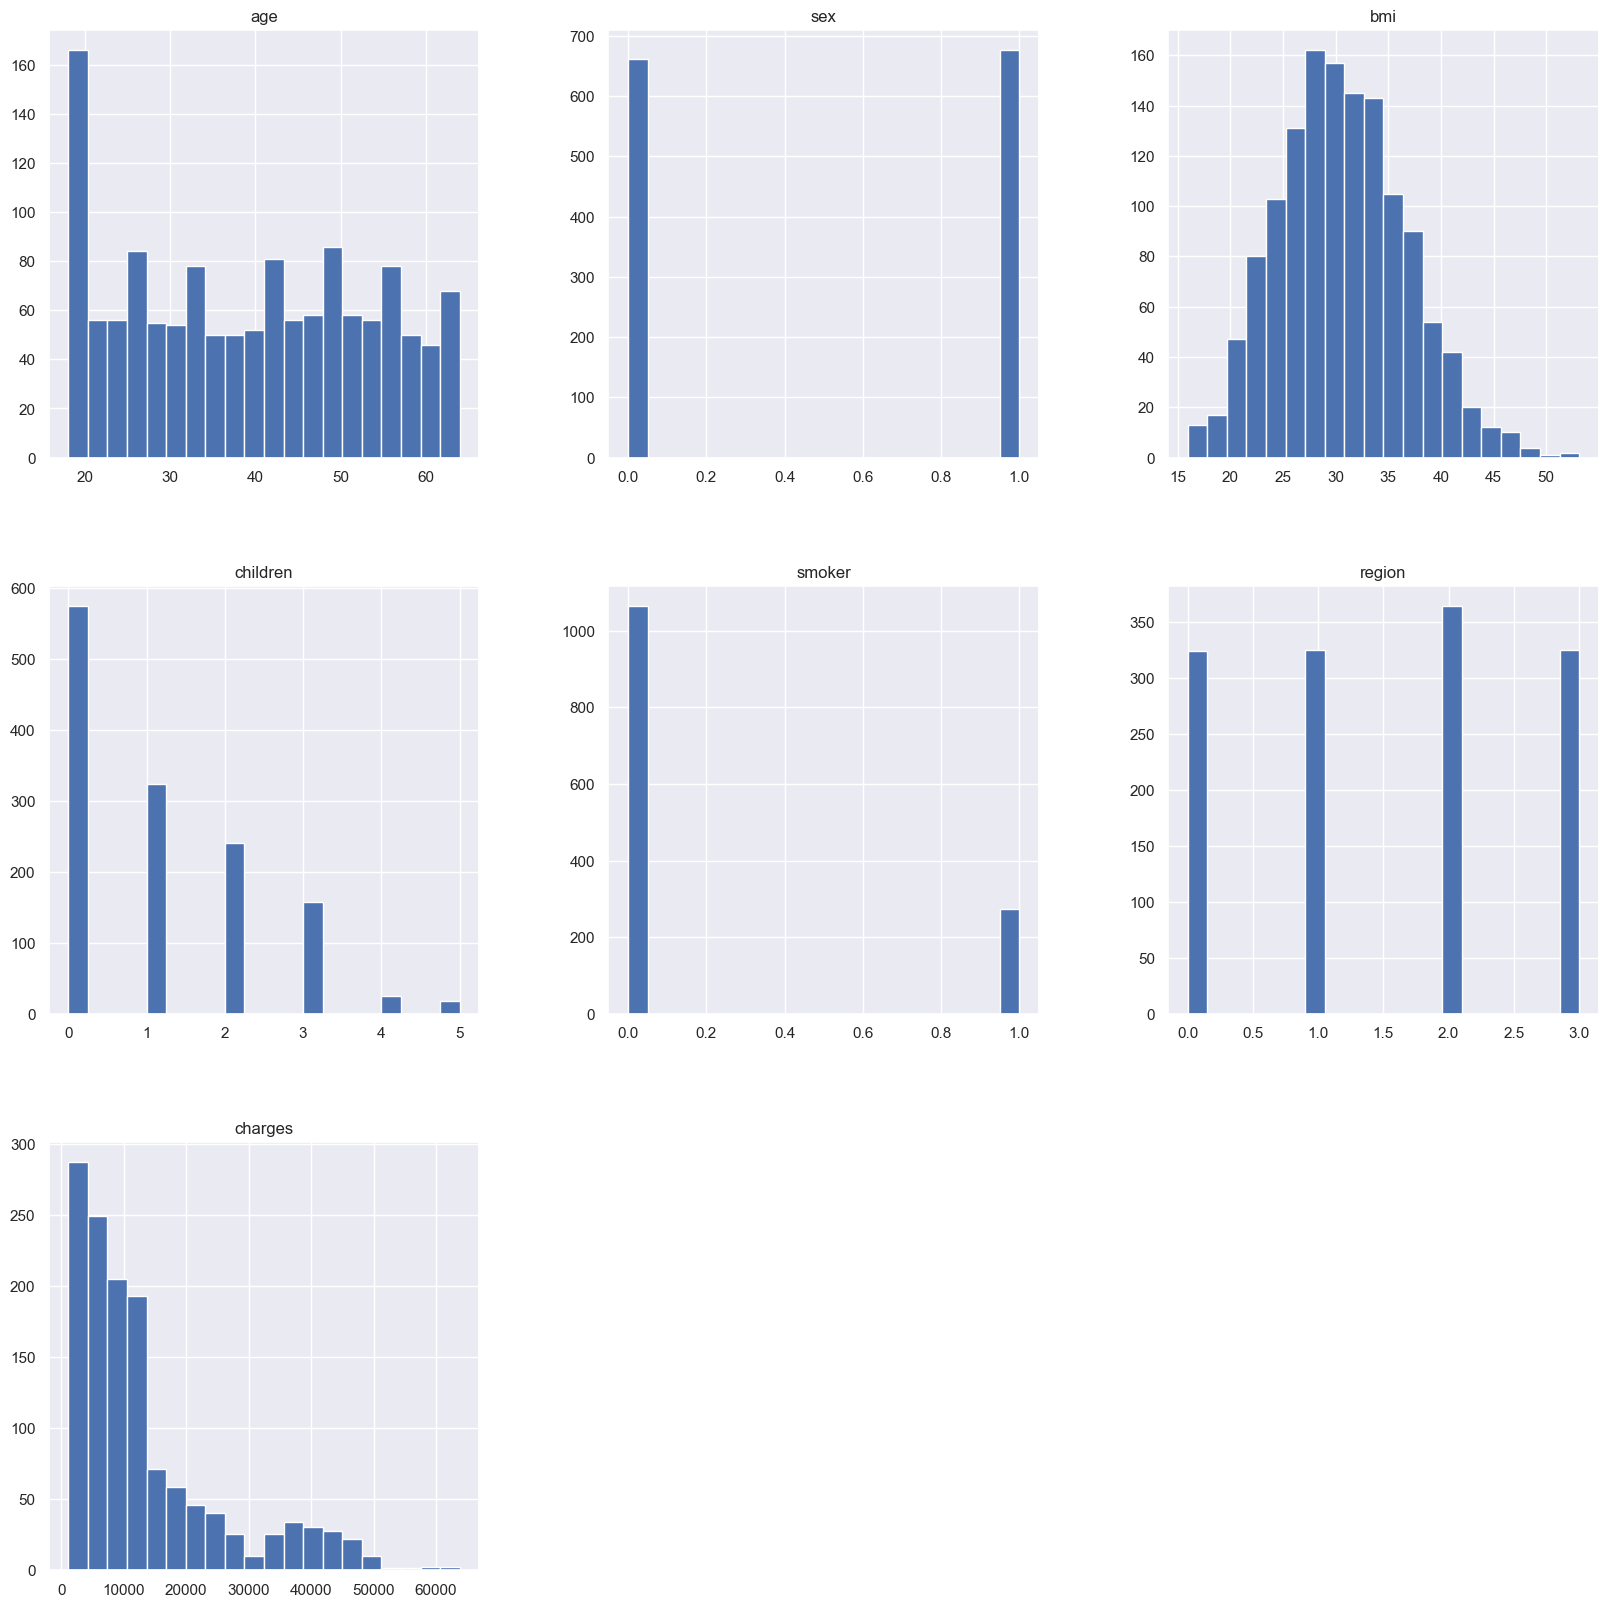

In [31]:
medData.hist(bins=20,figsize=(20,20))
plt.show()

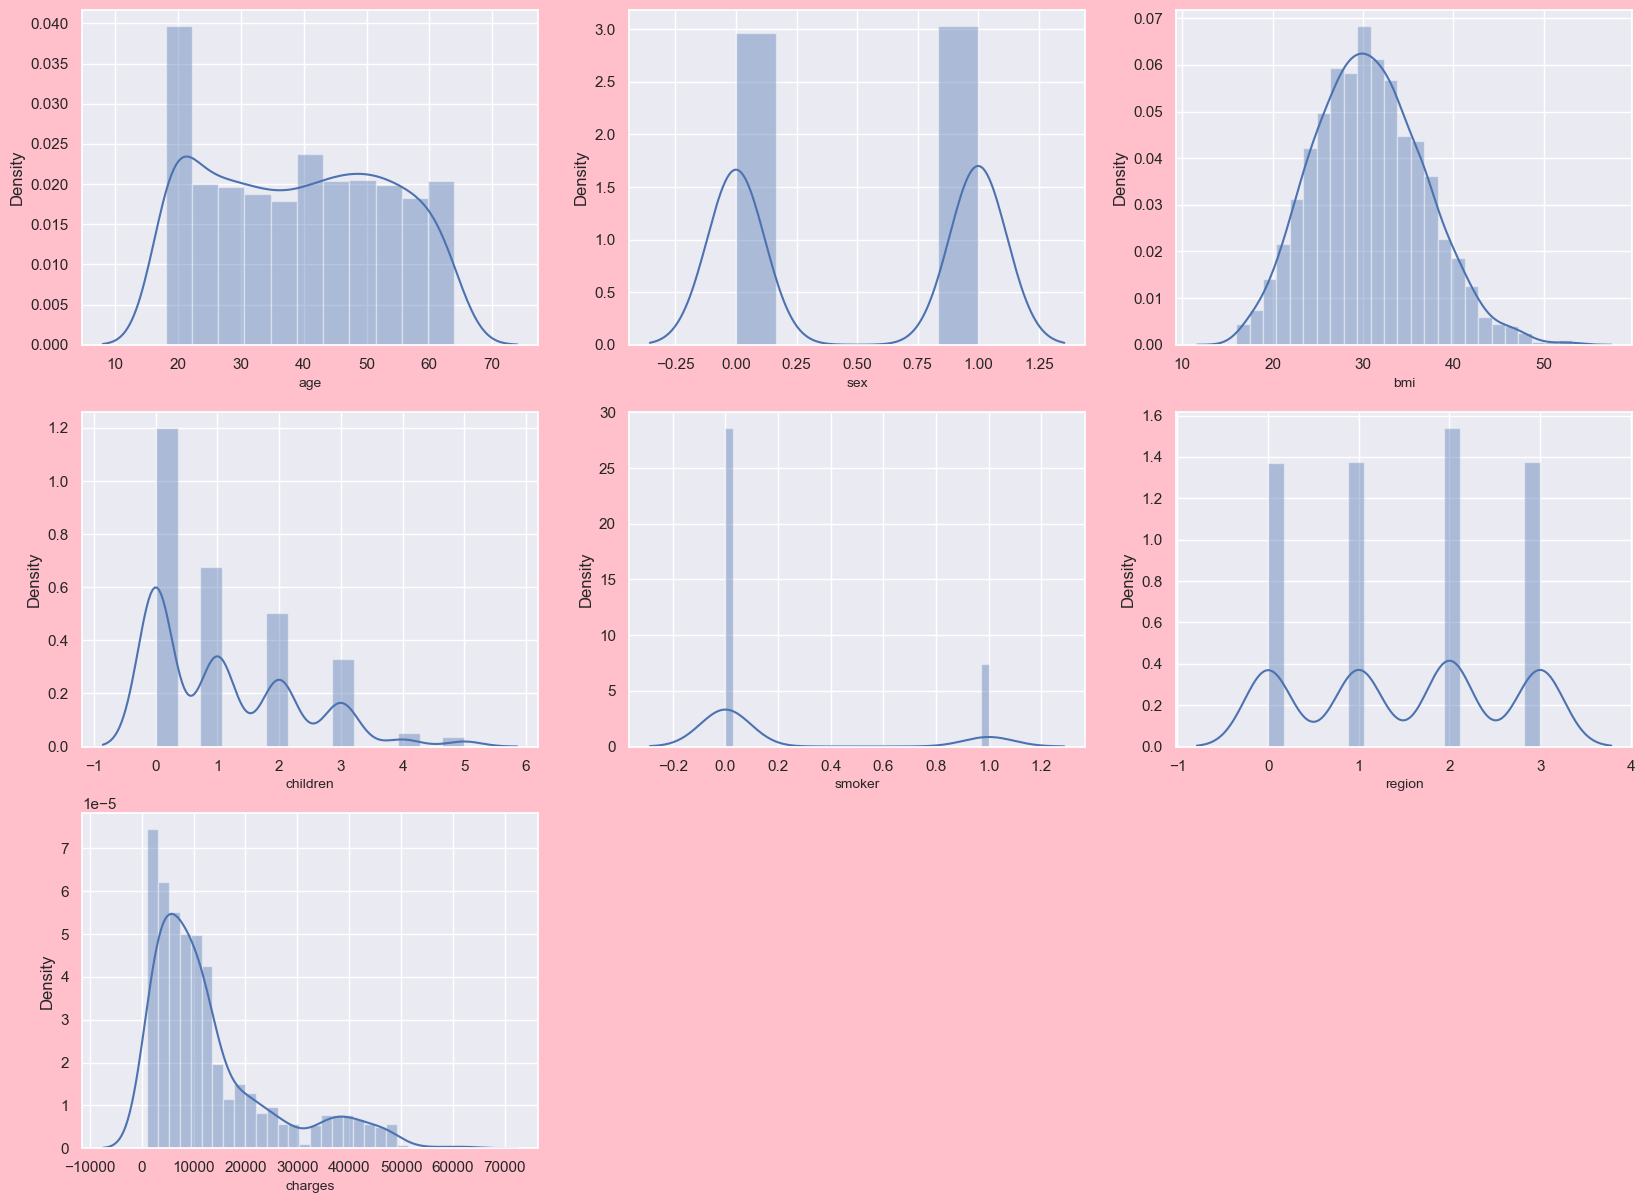

In [32]:
# using distplot
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1
for column in medData:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(medData[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


Skewness is noticeable in the dataset, indicating an asymmetrical distribution of values either to the right or left.

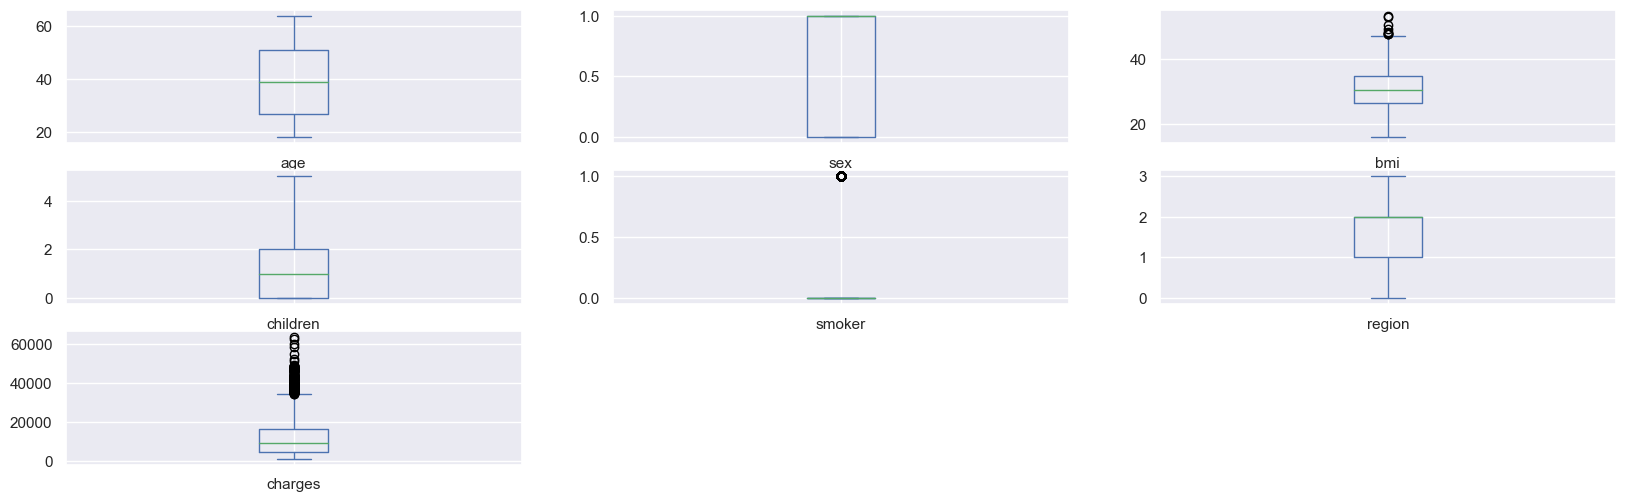

In [33]:
medData.plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
plt.show()

Key Observations:

Outliers are quite noticeable, with notable concentrations observed in 'BMI,' 'Smoker,' 'charges,'

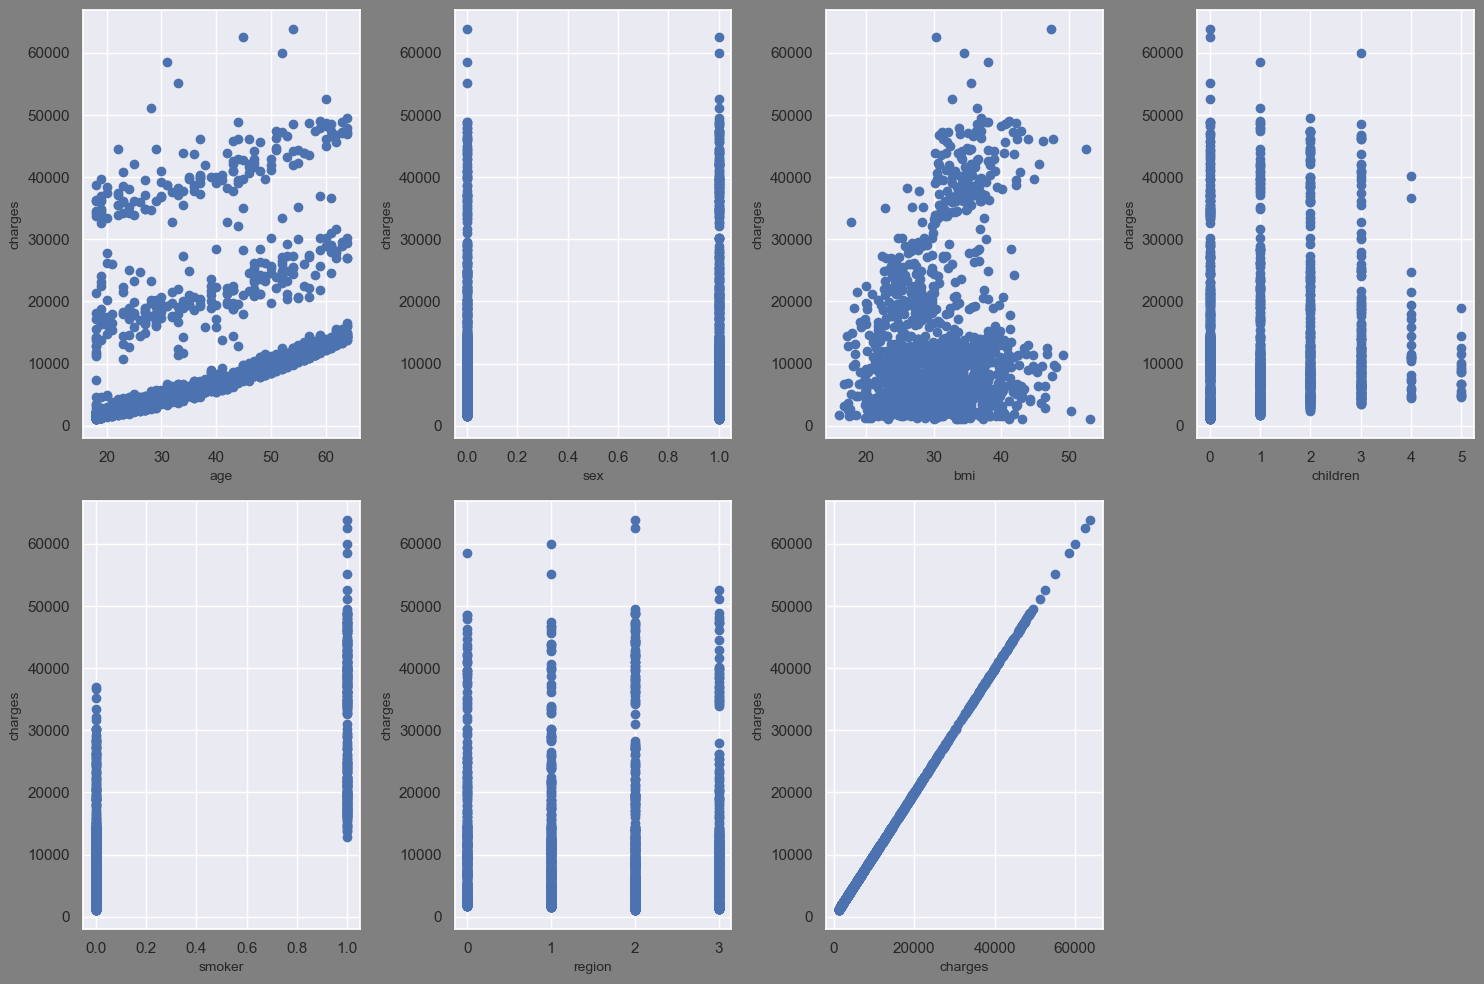

In [35]:
plt.figure(figsize = (15,10), facecolor='grey')
plotnumber = 1

for column in medData:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(medData[column],med_data['charges'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('charges',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [36]:
medData.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

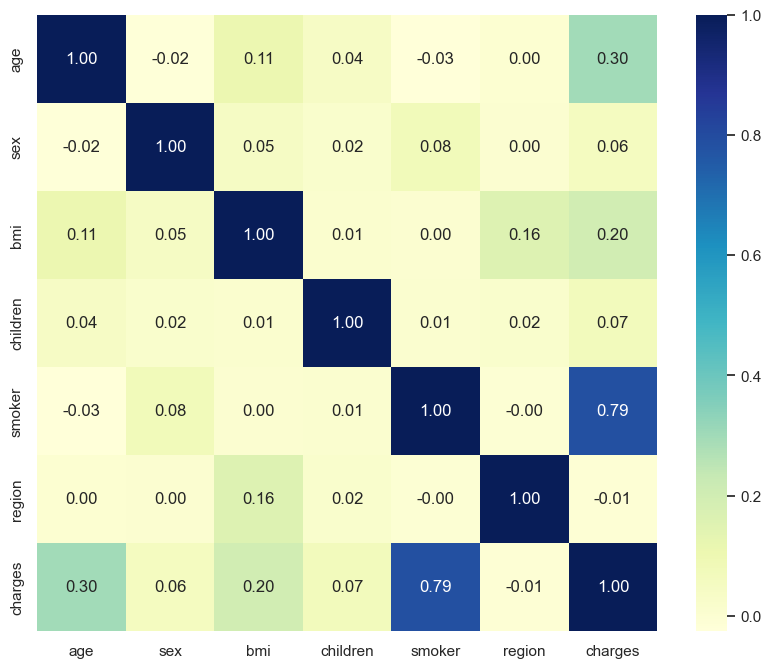

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(medData.corr(),annot=True,fmt='0.2f',cmap="YlGnBu" )

The variables 'Smoker,' 'Age,' and 'BMI' exhibit a positive correlation with each other, indicating that they are influential factors in determining the 'Charges' (target variable). Conversely, 'Sex,' 'Children,' and 'Region' demonstrate weaker correlations and do not significantly impact the 'Charges' variable.

In [38]:
medData.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

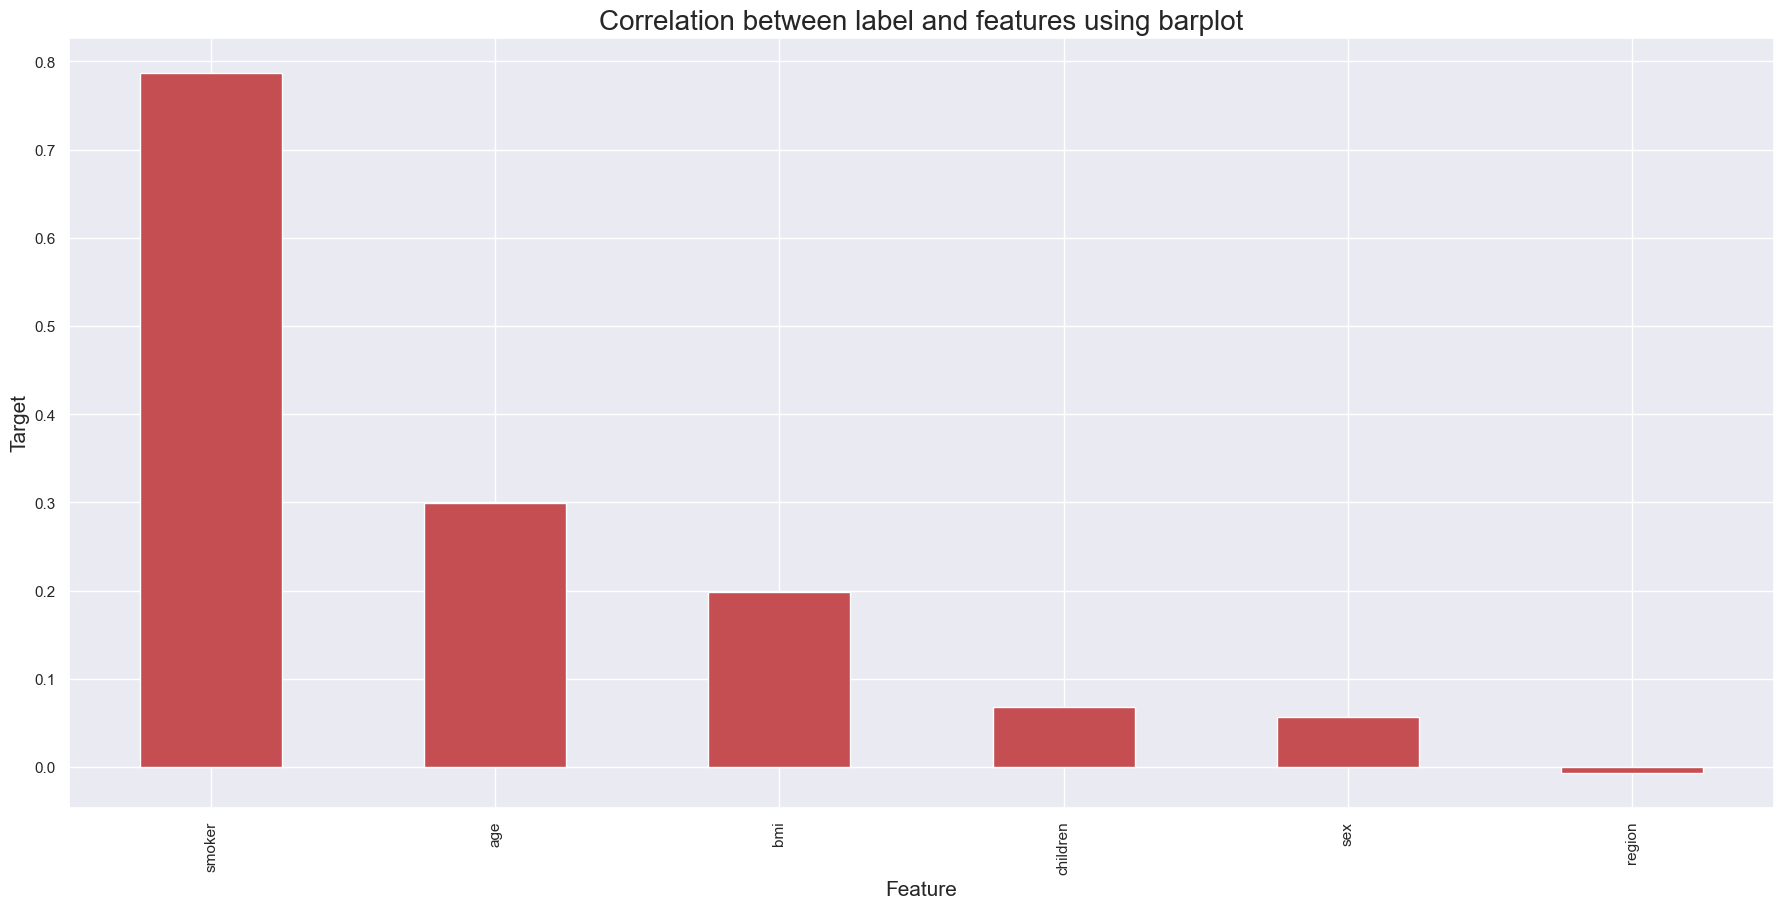

In [39]:
plt.figure(figsize = (22,10))
medData.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

The correlation is strongest in the 'Smoker' variable and weakest in the 'Region' variable.

In [43]:
medData.shape

(1338, 7)

In [44]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(medData))
z
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317]),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2]))

In [45]:
df=medData[(z<3).all(axis=1)]
df.shape

(1309, 7)

Filtering out the outliers from the dataset.

In [46]:
print('percentage of loss of data by zscore is :',(medData.shape[0]-df.shape[0])/medData.shape[0])

percentage of loss of data by zscore is : 0.021674140508221227



The data loss should be minimized to ensure it remains below 10%.

In [48]:
x=df.drop('charges',axis=1)
y=df['charges']

In [49]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [50]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

# Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


Feature scaling was performed using a standard scaler to mitigate bias issues within the data.

In [32]:
#Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region



VIF checks for multicollinearity in regression. High VIF means strong correlation between predictors, impacting result reliability. Low VIF improves model accuracy by identifying and addressing problematic variables.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection  import GridSearchCV

In [56]:

#Finding the best random state 
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Max. r2 score is ",maxAccu,"at random_state",maxRS)

Max. r2 score is  0.8163956888560486 at random_state 27


In [57]:
#Now splitting the dataset into the Training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=27)

In [58]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (916, 6)
Size of y_train :  (916,)
Size of X_test :  (393, 6)
Size of Y_test :  (393,)


# LinearRegression

In [60]:
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_lr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))
score = cross_val_score(lr,x,y,cv=5,scoring='r2')
print("Cross val score: ",score,"is ", score.mean())

R2 score:  0.8163956888560486
R2 score on training data:  72.38854306117618
Mean Absolute Error:  3779.430994123086
Mean Squared Error:  25743369.305243313
Root Mean Squared Error:  5073.792398713542
Cross val score:  [0.76337332 0.71273583 0.78072916 0.73045788 0.76622267] is  0.7507037701961409


# RandomForestRegressor

In [61]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_train = rf.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rf))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rf)))
score1 = cross_val_score(rf,x,y)
print("Cross val score: ",score1,"is ", score1.mean())

R2 score:  0.9042455895235294
R2 score on training data:  97.0999167669442
Mean Absolute Error:  2183.205143420866
Mean Squared Error:  13425834.808252264
Root Mean Squared Error:  3664.128110240179
Cross val score:  [0.85535147 0.78518012 0.84989215 0.82878567 0.84828945] is  0.8334997712221748


# GradientBoostingRegressor

In [62]:
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred_gr = gr.predict(x_test)
pred_train = gr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_gr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gr)))
score2 = cross_val_score(gr,x,y)
print("Cross val score: ",score2,"is ", score2.mean())

R2 score:  0.9179608668393324
R2 score on training data:  88.23247988431767
Mean Absolute Error:  2084.5844759152096
Mean Squared Error:  11502800.175434096
Root Mean Squared Error:  3391.5778297768866
Cross val score:  [0.87801961 0.80500612 0.88390216 0.84541512 0.8638385 ] is  0.8552363027833507


# Lasso

In [63]:
ls = Lasso()
ls.fit(x_train,y_train)
pred_ls = ls.predict(x_test)
pred_train = ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))
score3 = cross_val_score(ls,x,y)
print("Cross val score: ",score3,"is ", score3.mean())

R2 score:  0.8163895454880017
R2 score on training data:  72.38853846348161
Mean Absolute Error:  3779.367639974443
Mean Squared Error:  25744230.673864912
Root Mean Squared Error:  5073.8772821053635
Cross val score:  [0.76337505 0.71275985 0.7807142  0.73045566 0.76622802] is  0.7507065591488712


# Ridge

In [64]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))
score4 = cross_val_score(rd,x,y)
print("Cross val score: ",score4,"is ", score4.mean())

R2 score:  0.8163104433411097
R2 score on training data:  72.38845328685264
Mean Absolute Error:  3781.271062388362
Mean Squared Error:  25755321.675854962
Root Mean Squared Error:  5074.970115759793
Cross val score:  [0.7633537  0.71279257 0.78063397 0.73052688 0.76622221] is  0.750705866775889


# ExtraTreesRegressor

In [65]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))
score5 = cross_val_score(etr,x,y)
print("Cross val score: ",score5,"is ", score5.mean())

R2 score:  0.8744905839056281
R2 score on training data:  100.0
Mean Absolute Error:  2239.732852292113
Mean Squared Error:  17597817.99061154
Root Mean Squared Error:  4194.97532657959
Cross val score:  [0.83334206 0.75709747 0.83237219 0.80447108 0.83976937] is  0.8134104341307828


# KNN

In [66]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))
score6 = cross_val_score(knn,x,y)
print("Cross val score: ",score6,"is ", score6.mean())

R2 score:  0.8776882712263787
R2 score on training data:  84.4547409810903
Mean Absolute Error:  2708.0761341450384
Mean Squared Error:  17149466.61417661
Root Mean Squared Error:  4141.191448626422
Cross val score:  [0.83079348 0.7715433  0.82598029 0.79640205 0.82468182] is  0.8098801911996685


In [67]:
final_data = pd.DataFrame({'Model':['LR','RF','GBR','Lasso','Ridge','ETR','KNN'],
                    'R2 score':[r2_score(y_test,pred_lr)*100,
                                r2_score(y_test,pred_rf)*100,
                               r2_score(y_test,pred_gr)*100,
                               r2_score(y_test,pred_ls)*100,
                               r2_score(y_test,pred_rd)*100,
                                r2_score(y_test,pred_etr)*100,
                               r2_score(y_test,pred_knn)*100],
                    'Cross_val_score':[score.mean()*100,score1.mean()*100,score2.mean()*100,score3.mean()*100,score4.mean()*100,
                                      score5.mean()*100,score6.mean()*100]})
final_data['Score_diff'] = final_data['R2 score'] - final_data['Cross_val_score']

In [68]:
final_data

,Model,R2 score,Cross_val_score,Score_diff
0,LR,81.639569,75.070377,6.569192
1,RF,90.424559,83.349977,7.074582
2,GBR,91.796087,85.523630,6.272456
3,Lasso,81.638955,75.070656,6.568299
4,Ridge,81.631044,75.070587,6.560458
5,ETR,87.449058,81.341043,6.108015
6,KNN,87.768827,80.988019,6.780808



The GradientBoostingRegressor is yielding the highest accuracy rate at 91.7%.

Through the utilization of cross-validation scores, we've addressed the challenges of overfitting and underfitting. Notably, the ETR model exhibits the smallest disparity between accuracy and cross-validation scores, indicating its robust performance.

we should plot the ROC-AUC curve to check the best fit model

# HyperParameter tuning

In [69]:
lamda =  {'n_estimators': [500, 600, 700,800],
               'learning_rate': [0.005, 0.01, 0.02],
               'max_depth': [1, 2, 4, 8],
               'subsample': [0.500, 0.600, 0.700]}
model = GradientBoostingRegressor()
gsv = GridSearchCV(estimator = model, param_grid = lamda , cv=5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.005, 0.01, 0.02],
                         'max_depth': [1, 2, 4, 8],
                         'n_estimators': [500, 600, 700, 800],
                         'subsample': [0.5, 0.6, 0.7]})

In [76]:
gsv.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 600, 'subsample': 0.7}

In [77]:
model = GradientBoostingRegressor(n_estimators = 600, learning_rate = 0.01, max_depth = 2, subsample = 0.7)

In [78]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2 score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  0.9234773051233046
Mean Absolute Error:  2230.1070286671406
Mean Squared Error:  10729334.08899488
Root Mean Squared Error:  3275.5662241809246


In [79]:
r2_score(y_test,pred)*100

92.34773051233046

# Prediction

In [80]:
input_data = (60,1,36.005,0,1,2)

# Changing input_data to numpy array
data= np.asarray(input_data)

# Reshaping the array 
reshaped = data.reshape(1,-1)

pred_data = model.predict(reshaped)
print(pred_data)

print('The Insurance Cost is USD', pred_data[0])

[46099.03777785]
The Insurance Cost is USD 46099.03777784918
